# Slices Alignment with Morpho

This notebook demonstrates the process of Aligning spatial transcriptomics data. This is done in the following two steps:

1. Align spatial transcriptomics data from a set of multi-slices;
2. Reduce the amount of data by sampling to improve alignment speed.

Here, we develop a novel alignment method, Morpho, which utilized a Gaussian Process algorithm to align and integrate spatial transcriptomics data.

## Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import spateo as st

2023-07-24 17:41:40.675118: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Data source


In [2]:
# cellbin data
# cellbin_slices = st.sample_data.drosophila(filename="E7-9h_cellbin_h5ad.zip")[4:8]

cellbin_slices = [st.read_h5ad(f"../data/cellbin_slices/{i}.h5ad") for i in ["E8-10_b_S09", "E8-10_b_S10", "E8-10_b_S11", "E8-10_b_S12"]]
cellbin_slices

[AnnData object with n_obs × n_vars = 1745 × 9057
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial',
 AnnData object with n_obs × n_vars = 1769 × 9158
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial',
 AnnData object with n_obs × n_vars = 1244 × 8992
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial',
 AnnData object with n_obs × n_vars = 1715 × 9145
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial']

## Align spatial transcriptomics data from a set of multi-slices

### Visualize slices based on raw coordinates

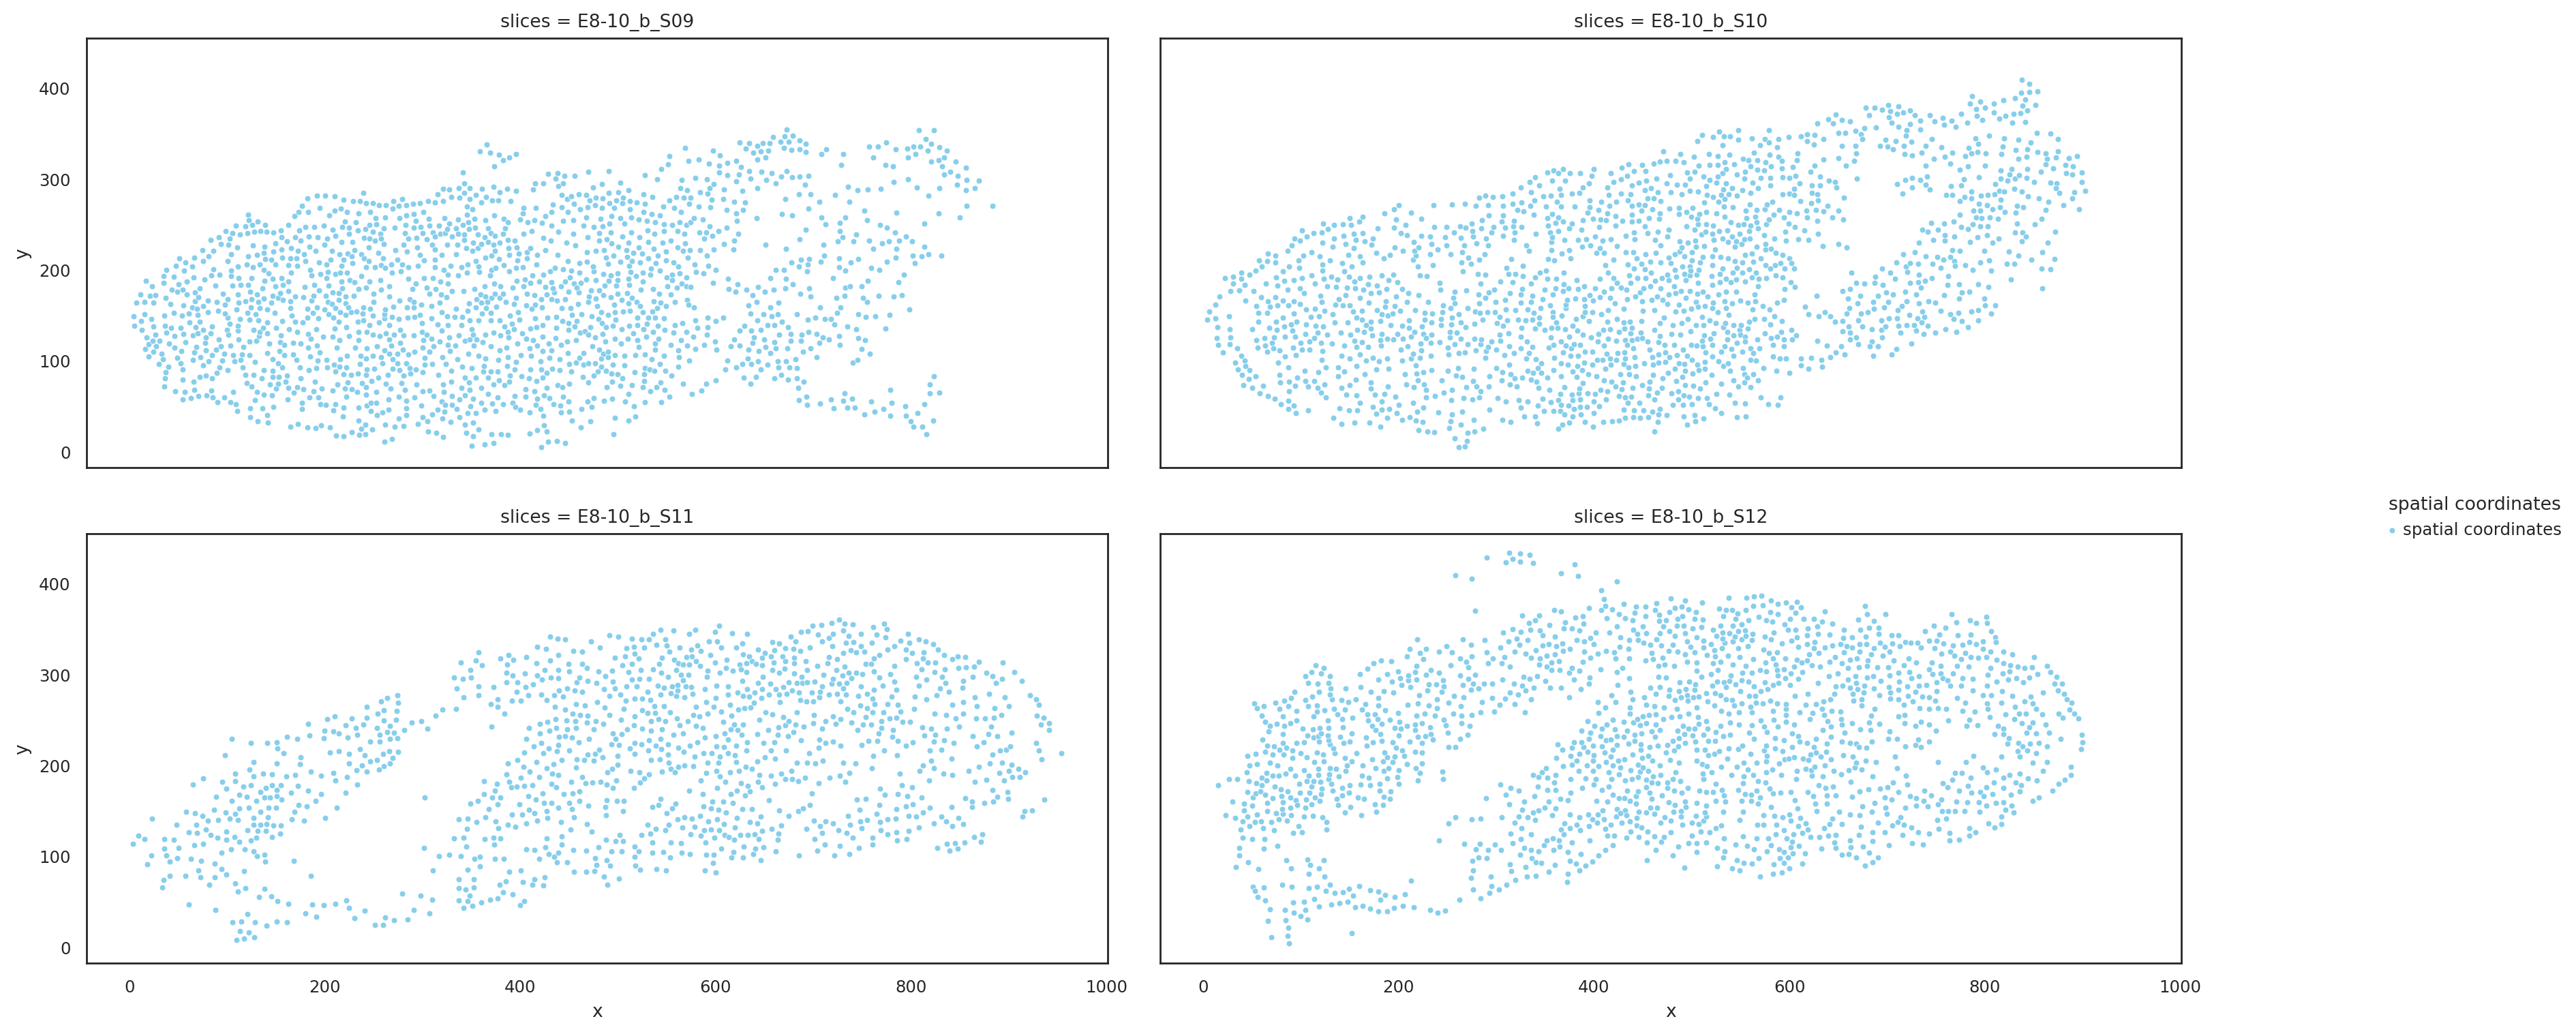

In [3]:
st.pl.multi_slices(
    slices=cellbin_slices,
    slices_key="slices",
    spatial_key="spatial",
    point_size=10,
    ncols=2,
)

### Slices alignment

In [4]:
aligned_slices, pis, sigma2s = st.align.morpho_align(
    models=cellbin_slices,
    spatial_key="spatial",
    key_added="align_spatial",
    mode="SN-S",
    SVI_mode=True,
    device="0" # or device="cpu"
)

|-----> [Models alignment based on morpho, mode: SN-S.] in progress: 33.3333%|-----> Filtered all samples for common genes. There are 8334 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 232.68878173828125.
|-----> Performing coarse rigid alignment...
|-----> Coarse rigid alignment done.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.4564s]
|-----> Key Parameters: gamma: 0.9228506088256836; beta2: 0.5335635542869568; sigma2: 0.0030608675442636013
|-----> [Models alignment based on morpho, mode: SN-S.] in progress: 66.6667%|-----> Filtered all samples for common genes. There are 8257 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 241.8182373046875.
|-----> Performing coarse rigid alignment...
|-----> Coarse rigid alignment done.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.2478s]
|-----> Key Parameters: gamma: 0.72239518

### Visualize slices based on aligned coordinates

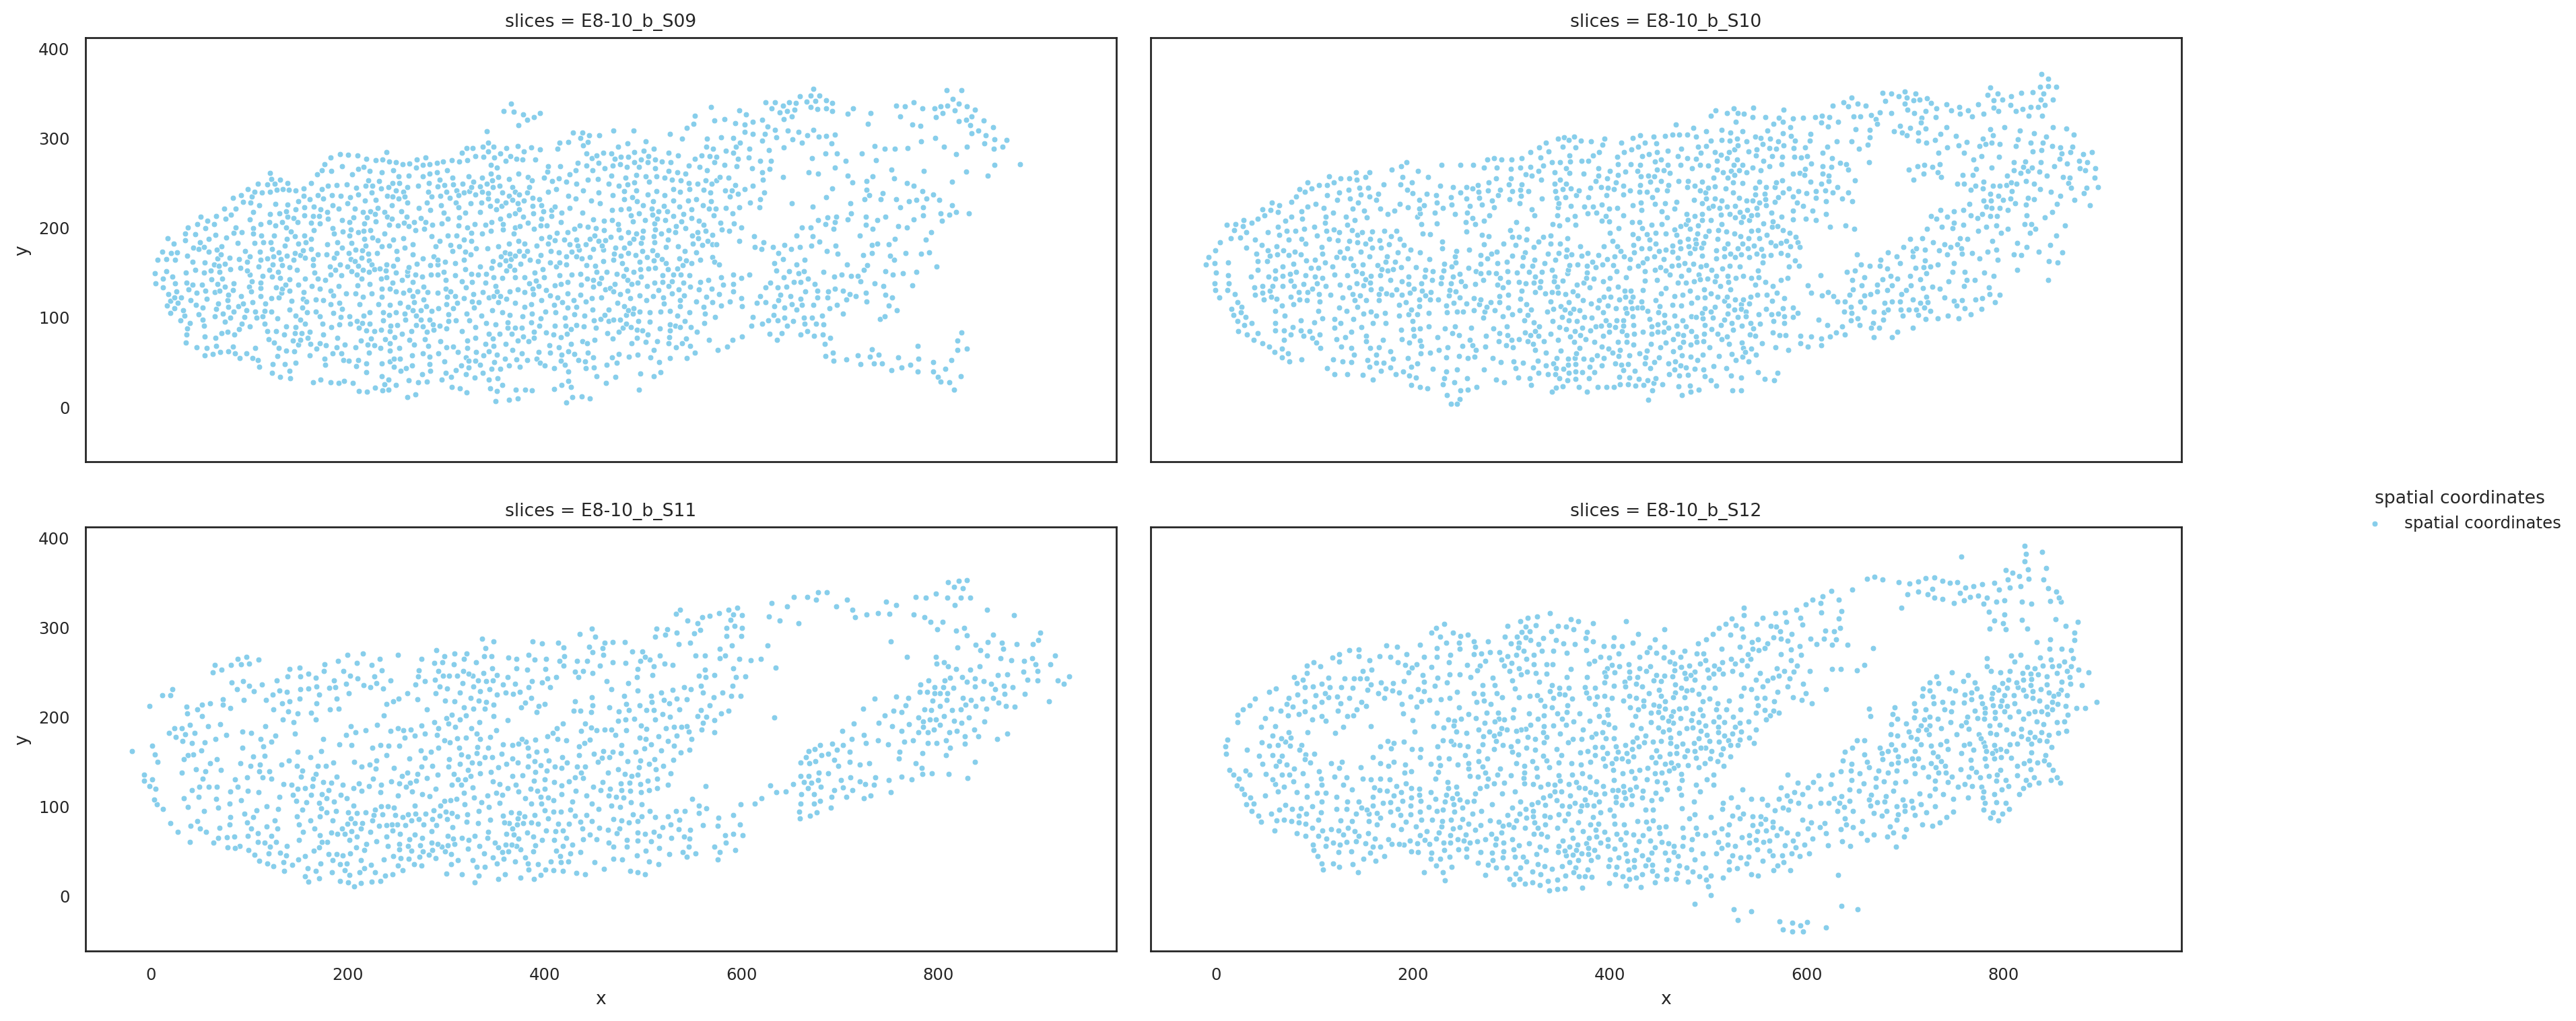

In [5]:
st.pl.multi_slices(
    slices=aligned_slices.copy(),
    slices_key="slices",
    spatial_key="align_spatial",
    point_size=10,
    ncols=2,
)

## Reduce the amount of data by down-sampling to improve alignment speed

### Slices alignment

In [6]:
aligned_slices, downsampling_slices, pis, pis_downsampling, siaga2s = st.align.morpho_align_ref(
    models=cellbin_slices,
    models_ref=None,
    n_sampling=500,
    sampling_method="trn",
    spatial_key="spatial",
    key_added="align_spatial",
    mode="SN-S",
    SVI_mode=True,
    device="0"
)

|-----> [Running TRN] in progress: 100.0000%|-----> [Running TRN] completed [19.5825s]
|-----> [Running TRN] in progress: 100.0000%|-----> [Running TRN] completed [19.8104s]
|-----> [Running TRN] in progress: 100.0000%|-----> [Running TRN] completed [19.8145s]
|-----> [Running TRN] in progress: 100.0000%|-----> [Running TRN] completed [19.3991s]
|-----> [Models alignment with ref-models based on morpho, mode: SN-S.] in progress: 33.3333%|-----> Filtered all samples for common genes. There are 8334 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 246.5740203857422.
|-----> Performing coarse rigid alignment...
|-----> Coarse rigid alignment done.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.2496s]
|-----> Key Parameters: gamma: 0.16604205965995789; beta2: 0.5303851962089539; sigma2: 0.0010000000474974513
|-----> [Models alignment with ref-models based on morpho, mode: SN-S.] in progress: 66.6667%|-----> F

### Visualize downsampling slices based on aligned coordinates

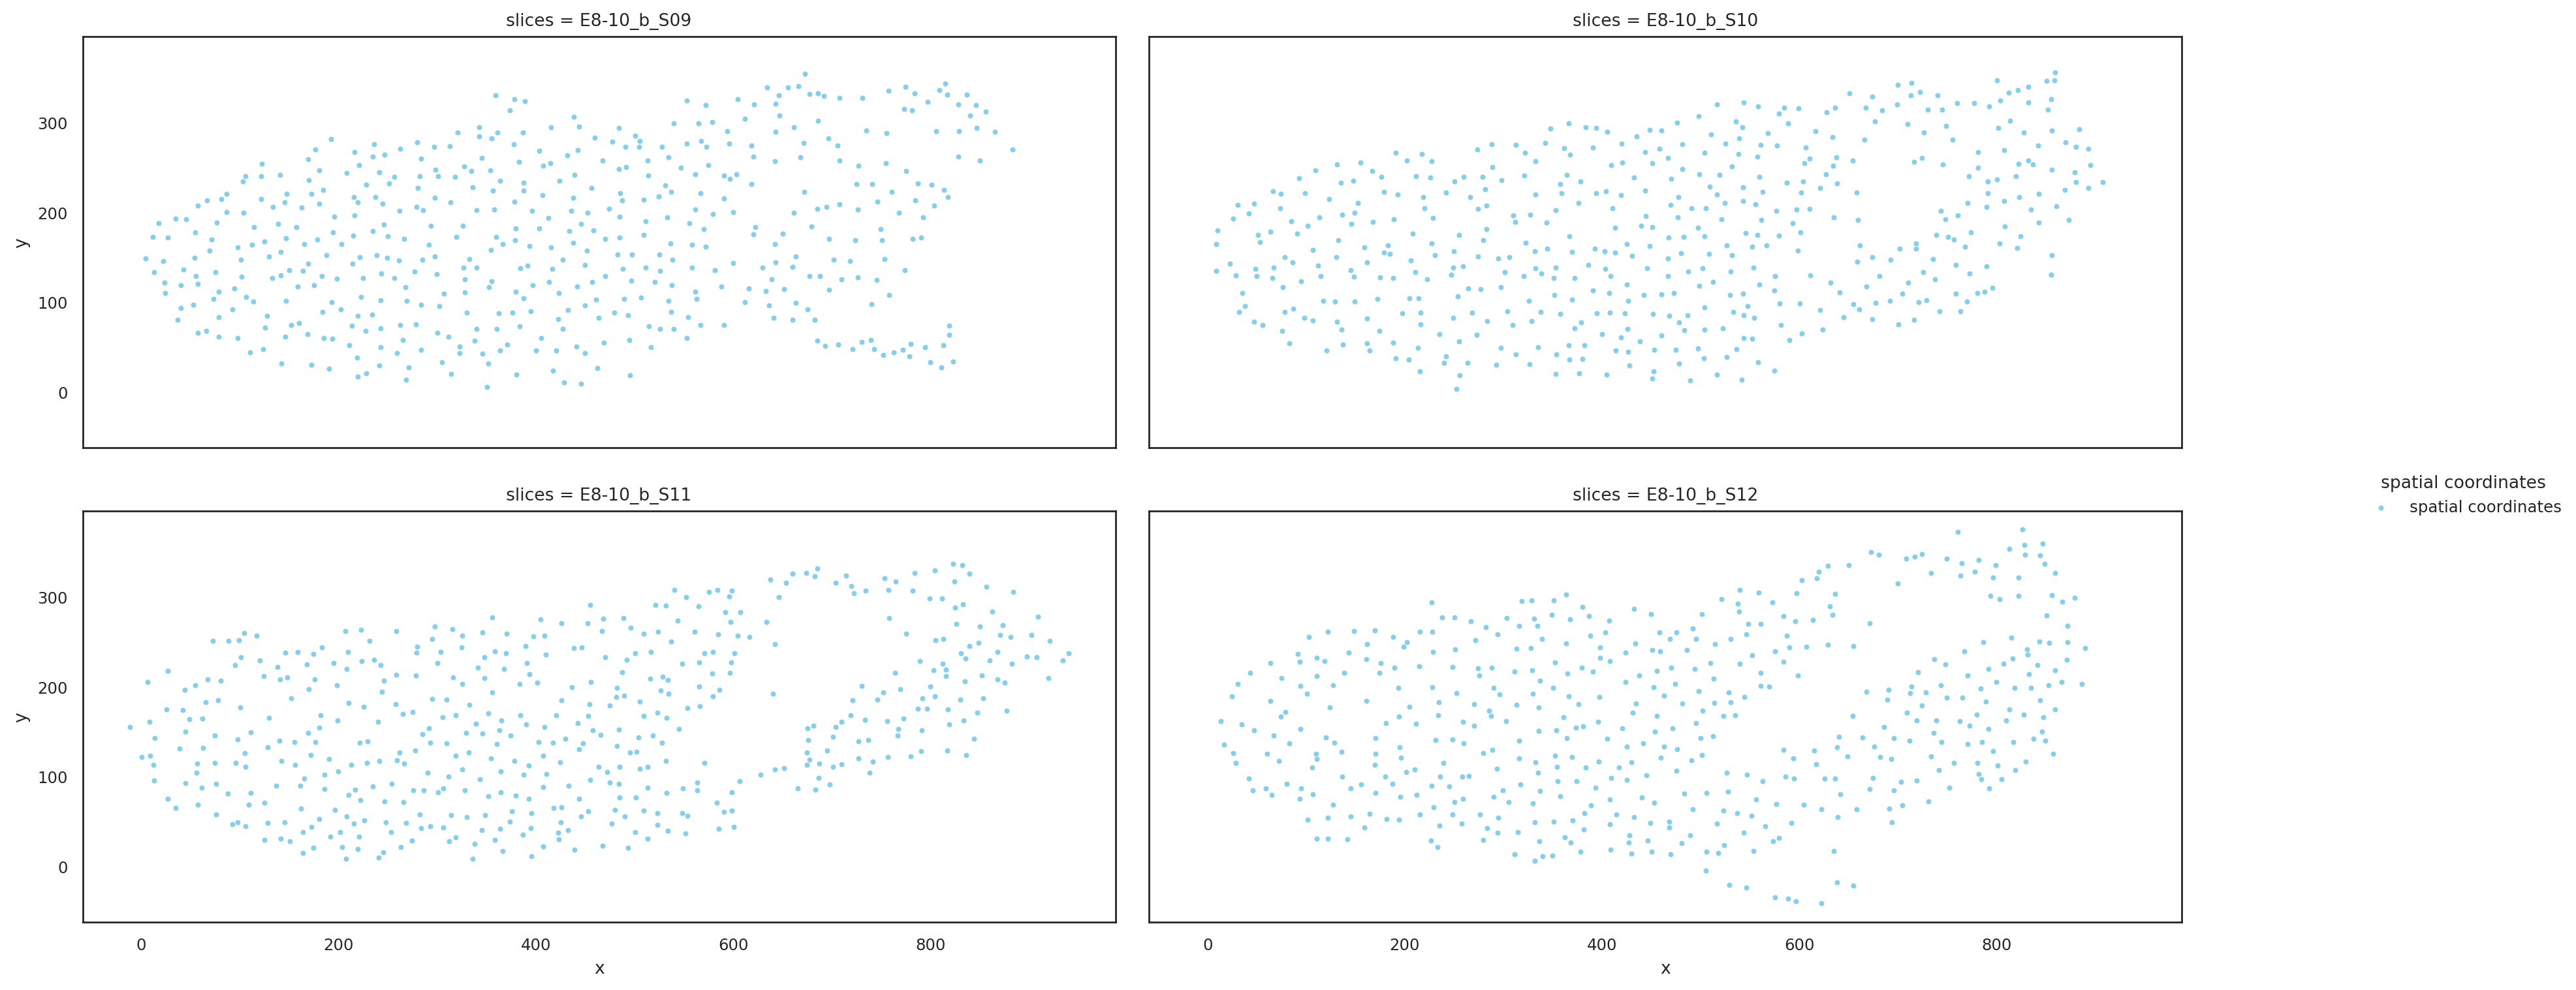

In [7]:
st.pl.multi_slices(
    slices=downsampling_slices.copy(),
    slices_key="slices",
    spatial_key="align_spatial",
    point_size=10,
    ncols=2,
)

### Visualize slices based on aligned coordinates

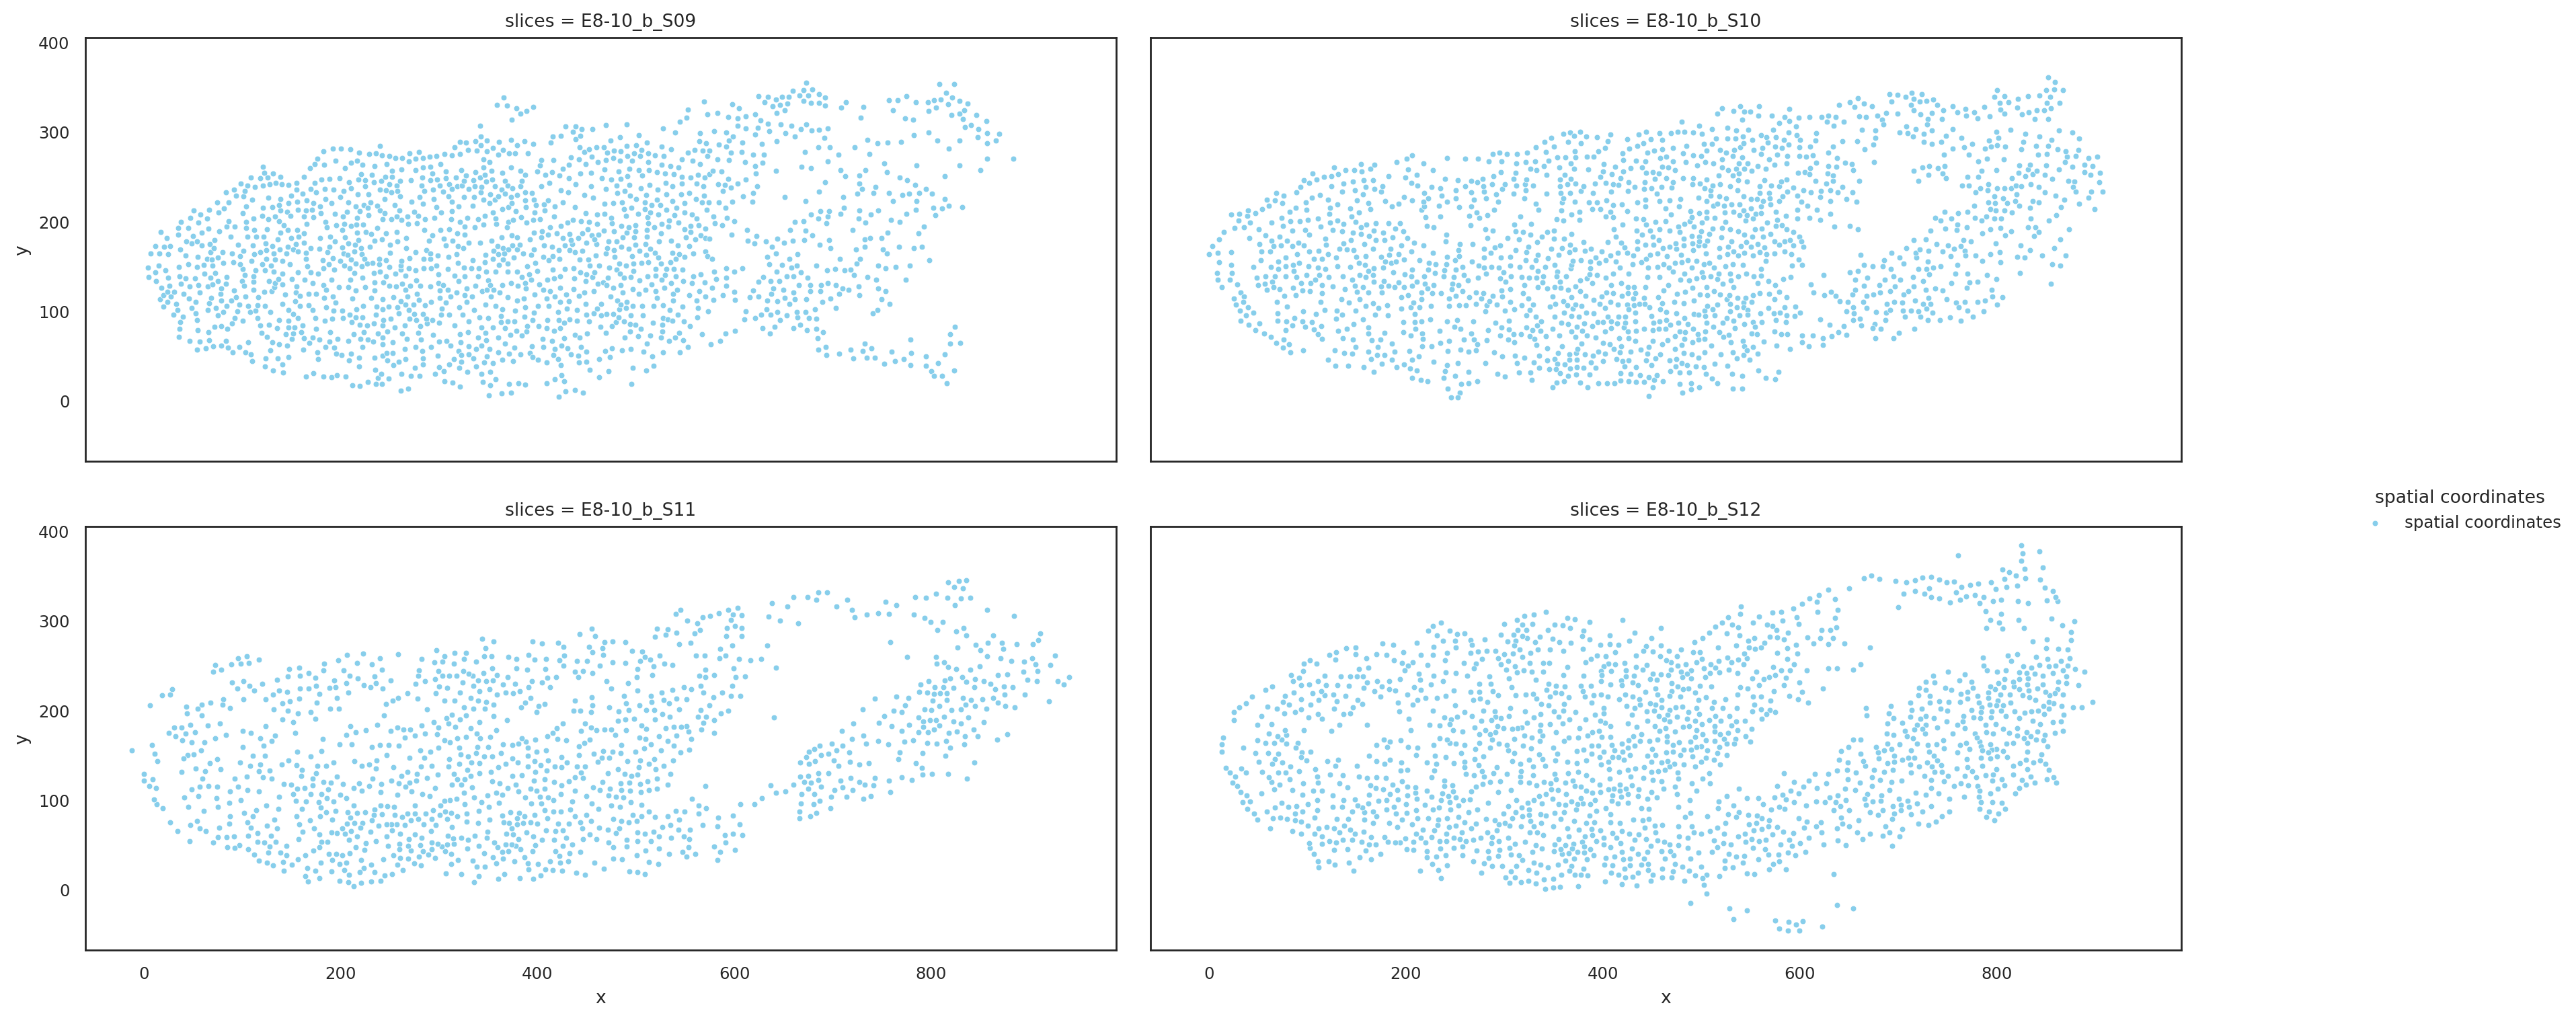

In [8]:
st.pl.multi_slices(
    slices=aligned_slices.copy(),
    slices_key="slices",
    spatial_key="align_spatial",
    point_size=10,
    ncols=2,
)